    Department Of Computer Science
    COMP338, Artificial Intelligence
    Dr. Mohammed Helal
    COMP338 | Section  


## <div align=center> Assignment #1 </div>
<div align=center><b>Round Table Seating Arrangement </b></div>
<div align=center>Graph-Search Problem</div>

    Prepeared by: Abdallah Aabed   
    ID: 1210802
<hr>

#### <b>Abstract</b>
In this report, the Round Table Seating arrangemnet is approached diffrently formulated as a search problem. The approchaes are ucs, greedy and A* searches. Then a comparison is made between them. Throughout this report, the theory, implemnattions, discussion and conclusion are presented. It is required that rach person should be seated next to their neighbors on the left and right to facilitate conversation. It also should form a closed loop, as it is a round table.

<hr>

#### <b>Table of Contents</b>
- <b>Introduction</b>
- <b>Objectives</b>
- <b>Theory</b>
- <b>Software Versions</b>
- <b>Algorithms Implementations</b>
- <b>Discussion</b>
- <b>Conclusion</b>

#### <b>List of Figures</b>
- Figure 1: Given Dislike Matrix
- Figure 2: Graph Visualization
- Figure 3: Round Table Seating Arrangement for UCS
- Figure 4: Round Table Seating Arrangement for Greedy
- Figure 5: Optimal Round Table Seating Arrangement

#### <b>List of Tables</b>
- Table 1: Software Tools and versions
- Table 2: Implemenataions comparisons and results.

<hr>

#### <b>Introduction</b>

In this notebook a heuristic table representing the dislike percentages between pairs of individuals, indicating the level of conflict or discomfort each person feels towards others is provided. The goal is to seat the individuals around a round table in the most suitable arrangement to minimize conflict while ensuring that each person can talk to their neighbors on the left and right. The heuristic table provides dislike percentages between pairs of individuals, with higher percentages indicating greater dislike or conflict. For example, a dislike percentage of 20% between Person A and Person B indicates a low level of conflict, while a dislike percentage of 80% indicates a high level of conflict.

 The follwing figure shows the matrix:

<div align='center'>

![Dislike matrix](./attachments/matrix.png)

<b>Figure 1: </b>Given Dislike Matrix
</div>

#### <b>Objectives</b>
- To implemnet Uniform Cost Search (UCS) algorithm
- To implemet Greedy Search algorithm
- To implement A* Search algorithm
- To determine which algorithm can find the best seating arrangement that minimizes conflict based on the provided heuristic table and the Non-Linear Dislike Cost function.

#### <b>Theory</b>

##### <b>Informed Vs. Uninformed Search</b>

Uninformed or blind search strategies are those which use only the components we provide in the problem definition. So, they differentiate only between goal and non-goal states and can’t inspect the inner structure of a state to estimate how close it is to the goal. In contrast, the informed search strategies use additional knowledge beyond what we provide in the problem definition. The additional knowledge is available through a function called a heuristic. It receives a state at its input and estimates how close it is to the goal. Using a heuristic, a search strategy can differentiate between non-goal states and focus on those that look more promising. That is why informed search techniques can find the goal faster than an uninformed algorithm, provided that the heuristic function is well-defined. [2] 

##### <b>Uniform Cost Search (UCS)</b>
Uniform Cost Search (UCS) is a type of uninformed search that performs a search based on the lowest path cost. UCS helps us find the path from the starting node to the goal node with the minimum path cost. [3]
In graph-serach problem the impelemnation is done using a prioroty queue.

##### <b>Greedy</b>
An algorithm is greedy when the path picked is regarded as the best option based on a specific criterion without considering future consequences. But it typically evaluates feasibility before making a final decision. The correctness of the solution depends on the problem and criteria used. [4]

##### <b>A star search</b>
Is an informed search algorthim,

#### <b>Tools and Versions</b>

The below table shows the tools and versions used to solve this problem.

<b>Table 1:</b> Software Tools and versions

<div align="center">


|Tool | Version |
|-----|---------|
|Python|3.12.2|
|Numpy|1.26.4|
|Matplotlib|3.8.2|
|Pandas|2.2.1|
|Visual Studio Code |Updated|
|networkx|3.0.0|
|heapq|last update|

</div>

<b>Neccessary Imports</b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import heapq

#### <b>Data Structure</b>

<b>The follownig dislike matrix was given:</b>

In [2]:
dislike_matrix = {
    'Khalid': {'Khalid': 0.0, 'Ibrahim': 0.45, 'Fuad': 0.78, 'Hakam': 0.81, 'Samir': 0.26, 'Kamal': 0.75, 'Hani': 0.92, 'Ayman': 0.64, 'Salem': 0.99, 'Ahmed': 0.43},
    'Ibrahim': {'Khalid': 0.45, 'Ibrahim': 0.0, 'Fuad': 0.81, 'Hakam': 0.87, 'Samir': 0.37, 'Kamal': 0.42, 'Hani': 0.53, 'Ayman': 0.88, 'Salem': 0.62, 'Ahmed': 0.76},
    'Fuad': {'Khalid': 0.78, 'Ibrahim': 0.81, 'Fuad': 0.0, 'Hakam': 0.92, 'Samir': 0.97, 'Kamal': 0.53, 'Hani': 0.99, 'Ayman': 0.90, 'Salem': 0.17, 'Ahmed': 0.10},
    'Hakam': {'Khalid': 0.81, 'Ibrahim': 0.87, 'Fuad': 0.92, 'Hakam': 0.0, 'Samir': 0.63, 'Kamal': 0.88, 'Hani': 0.78, 'Ayman': 0.51, 'Salem': 0.55, 'Ahmed': 0.33},
    'Samir': {'Khalid': 0.26, 'Ibrahim': 0.37, 'Fuad': 0.97, 'Hakam': 0.63, 'Samir': 0.0, 'Kamal': 0.43, 'Hani': 0.86, 'Ayman': 0.96, 'Salem': 0.20, 'Ahmed': 0.48},
    'Kamal': {'Khalid': 0.75, 'Ibrahim': 0.42, 'Fuad': 0.53, 'Hakam': 0.88, 'Samir': 0.43, 'Kamal': 0.0, 'Hani': 0.91, 'Ayman': 0.63, 'Salem': 0.76, 'Ahmed': 0.82},
    'Hani': {'Khalid': 0.92, 'Ibrahim': 0.53, 'Fuad': 0.99, 'Hakam': 0.78, 'Samir': 0.86, 'Kamal': 0.91, 'Hani': 0.0, 'Ayman': 0.70, 'Salem': 0.11, 'Ahmed': 0.30},
    'Ayman': {'Khalid': 0.64, 'Ibrahim': 0.88, 'Fuad': 0.90, 'Hakam': 0.51, 'Samir': 0.96, 'Kamal': 0.63, 'Hani': 0.70, 'Ayman': 0.0, 'Salem': 0.90, 'Ahmed': 0.55},
    'Salem': {'Khalid': 0.99, 'Ibrahim': 0.62, 'Fuad': 0.17, 'Hakam': 0.55, 'Samir': 0.20, 'Kamal': 0.76, 'Hani': 0.11, 'Ayman': 0.90, 'Salem': 0.0, 'Ahmed': 0.68},
    'Ahmed': {'Khalid': 0.43, 'Ibrahim': 0.76, 'Fuad': 0.10, 'Hakam': 0.33, 'Samir': 0.48, 'Kamal': 0.82, 'Hani': 0.30, 'Ayman': 0.55, 'Salem': 0.68, 'Ahmed': 0.0},
}

<b>Using pandas dataframe</b>

In [3]:
df_dislike = pd.DataFrame.from_dict(dislike_matrix, orient='index')
df_dislike = df_dislike*100
df_dislike.astype(int)

,Khalid,Ibrahim,Fuad,Hakam,Samir,Kamal,Hani,Ayman,Salem,Ahmed
Khalid,0,45,78,81,26,75,92,64,99,43
Ibrahim,45,0,81,87,37,42,53,88,62,76
Fuad,78,81,0,92,97,53,99,90,17,10
Hakam,81,87,92,0,63,88,78,51,55,33
Samir,26,37,97,63,0,43,86,96,20,48
Kamal,75,42,53,88,43,0,91,63,76,82
Hani,92,53,99,78,86,91,0,70,11,30
Ayman,64,88,90,51,96,63,70,0,90,55
Salem,99,62,17,55,20,76,11,90,0,68
Ahmed,43,76,10,33,48,82,30,55,68,0


<b>Initilaize the edges and the nodes from the datframe</b>

Using a Graph datastructure

In [4]:
graph = nx.Graph()
graph.add_nodes_from(df_dislike.index)

# From the dataframe I add the weights to the graph
for i in range(len(df_dislike)):
    for j in range(i + 1, len(df_dislike)):
        weight = df_dislike.iloc[i, j]
        if weight != 0:
            graph.add_edge(df_dislike.index[i], df_dislike.index[j], weight=weight)

# Here I make a loopback to the node itself with weight 0
for node in graph.nodes():
    graph.add_edge(node, node, weight=0)

print(graph)

Graph with 10 nodes and 55 edges


<b>Weighted Grpah Visualization</b>

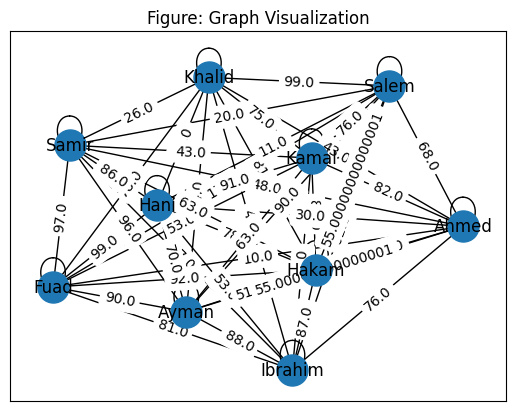

In [5]:
pos = nx.spring_layout(graph)  
labels = nx.get_edge_attributes(graph, 'weight')
nx.draw_networkx_nodes(graph, pos, node_size=500)
nx.draw_networkx_edges(graph, pos)
nx.draw_networkx_edge_labels(graph, pos, edge_labels=labels)
nx.draw_networkx_labels(graph, pos)
plt.title('Figure 2: Graph Visualization')
plt.show()

This is a complete graph which means that there exists a path between any two vertices in the graph

#### <b>Task 2: Cost Function</b>

The cost function used is a Non-Linear Dislike Cost function. Define a non-linear function f(x) that maps dislike percentages to costs. e.g., f(x) = x^2 would make high dislike percentages have a quadratically higher cost.

`f(n) = sum(dislike_percentages_between_neighbors) + sum(f(dislike_percentages_between_neighbors))`

The aim of this function is to penalize highly disliked pairs more severely than just a constant of a linear mapping.

In [6]:
def total_cost_from_path(path, graph):
    """
    The cost function, this will compute the total cost of the path in a graph.
    Args:
        path (list): List of nodes or a specific seating arrangements.
        graph (nx.Graph): graph obj. that has the nodes and the edges.
    Return:
        Represents the total dislike in the whole path 
    """
    total_cost = 0.0
    if len(path) == 0:
        return None
    
    for i in range(len(path)):
        person1 = path[i]
        person2 = path[(i + 1) % len(path)]  
        if graph.has_edge(person1, person2):
            dislike_percentage = graph[person1][person2]['weight']
            total_cost += dislike_percentage**2 # non-linearity
    return total_cost

#### <b>Table solution visualization</b>

- This function is created to visulaize the round table arrangemnet

In [26]:
def visualize_round_table(arrangement, title):
    """
    Visualizes the round table arrangement using a graph plot.
    Args:
        arrangement (list): the seating arrangement in order.
    Returns:
        None
    """
    G = nx.cycle_graph(len(arrangement))
    node_labels = {i: name for i, name in enumerate(arrangement)}
    pos = nx.circular_layout(G)
    edges = [(arrangement[i], arrangement[(i + 1) % len(arrangement)]) for i in range(len(arrangement))]
    valid_edges = [edge for edge in edges if edge[0] in G.nodes and edge[1] in G.nodes]
    
    nx.draw(G, pos, with_labels=True, labels=node_labels, node_color='skyblue', node_size=800, font_size=10, font_weight='bold')
    nx.draw_networkx_edges(G, pos, edgelist=valid_edges, edge_color='orange', width=2)
    plt.title(title)
    plt.show()

#### <b>Task 1: Algorithms Implementations</b>

<b>Uniform Cost Search (UCS) algorithm Implementation</b>

In [8]:
def uniform_cost_search(graph):
    """
    An implemnetation of Uniform Cost Search (UCS) algorithm that finds the shortest path
    Args:
        graph (nx.Graph): graph of the data
        start_node (str): the start node       
    Returns:
        list: Optimal seating arrangement (path) minimizing conflict.
    """
    min_cost = float('inf')
    optimal_arrangement = None
    individuals = list(graph.nodes)
    if len(individuals) == 0:
        return None
    
    priority_queue = []
    heapq.heappush(priority_queue, (0, [individuals[0]]))  # Start from the first individual
    
    while priority_queue:
        current_cost, current_path = heapq.heappop(priority_queue)
        current_node = current_path[-1]
        
        # Check if we've completed a full cycle (path contains all individuals)
        if len(current_path) == len(individuals) and current_path[0] in graph.neighbors(current_node):
            current_cost = total_cost_from_path(current_path, graph)
            if current_cost < min_cost:
                min_cost = current_cost
                optimal_arrangement = current_path
                continue  
        
        for neighbor in graph.neighbors(current_node):
            if neighbor not in current_path:
                new_path = current_path + [neighbor]
                new_cost = total_cost_from_path(new_path, graph)
                heapq.heappush(priority_queue, (new_cost, new_path))
    
    return optimal_arrangement, min_cost

- Call function on the data and check the time, performace:

In [20]:
%%time
optimal_arrangement_ucs, min_cost = uniform_cost_search(graph)
print("The best round table arrangmnet using UCS is: ",optimal_arrangement_ucs)
print("UCS min total cost", min_cost)
print("Average dislike percenatge per edge: ", np.sqrt(min_cost/55))

The best round table arrangmnet using UCS is:  ['Khalid', 'Samir', 'Kamal', 'Ibrahim', 'Hani', 'Salem', 'Fuad', 'Ahmed', 'Hakam', 'Ayman']
UCS min total cost 15394.0
Average dislike percenatge per edge:  16.729940498725902
CPU times: total: 23.5 s
Wall time: 42.2 s


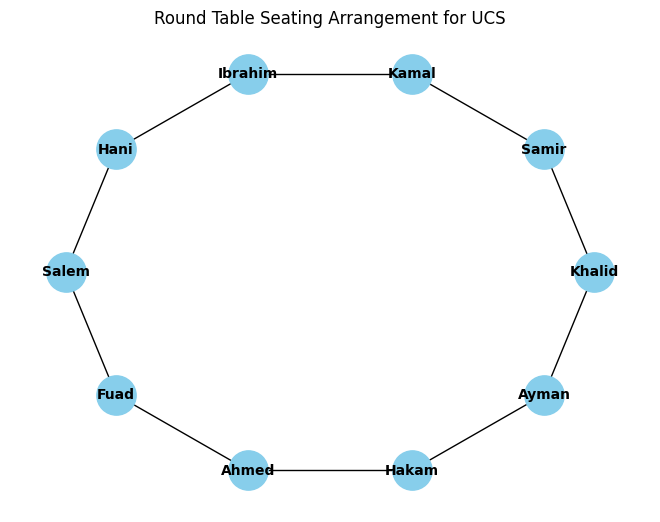

In [22]:
visualize_round_table(optimal_arrangement_ucs, 'Figure 3: Round Table Seating Arrangement for UCS')

<b>Greedy Search algorithm Implementation</b>

In [10]:
def  greedy_search(graph):
    """
    An implemnetation of greedy search algorithm that finds the round arranemnet with minumum hate 
    Args:
        
    Returns:
   
    """
    individuals = list(graph.nodes)
    if len(individuals) == 0:
        return None
    
    current_node = individuals[0]
    path = [current_node]
    visited = {current_node}
    
    while len(path) < len(individuals):
        min_cost = float('inf')
        best_next_node = None
        
        for neighbor in graph.neighbors(current_node):
            if neighbor not in visited:
                new_path = path + [neighbor]
                new_cost = total_cost_from_path(new_path, graph)
                if new_cost < min_cost:
                    min_cost = new_cost
                    best_next_node = neighbor
        
        if best_next_node is None:
            break  
        
        path.append(best_next_node)
        visited.add(best_next_node)
        current_node = best_next_node
    
    if len(path) == len(individuals) and path[0] in graph.neighbors(path[-1]):
        return path, min_cost
    else:
        return None  # Fails to find arrangement

- Call function on the data and check the time, performace:

In [23]:
%%time
optimal_arrangement_greedy, min_cost = greedy_search(graph)
print("The best round table arrangmnet using Greed is: ",optimal_arrangement_greedy)
print("Greedy min total cost", min_cost)
print("Average dislike percenatge per edge: ", np.sqrt(min_cost/55))

The best round table arrangmnet using Greed is:  ['Khalid', 'Samir', 'Ibrahim', 'Kamal', 'Ayman', 'Ahmed', 'Fuad', 'Salem', 'Hani', 'Hakam']
Greedy min total cost 23958.0
Average dislike percenatge per edge:  20.871032557111302
CPU times: total: 0 ns
Wall time: 1.62 ms


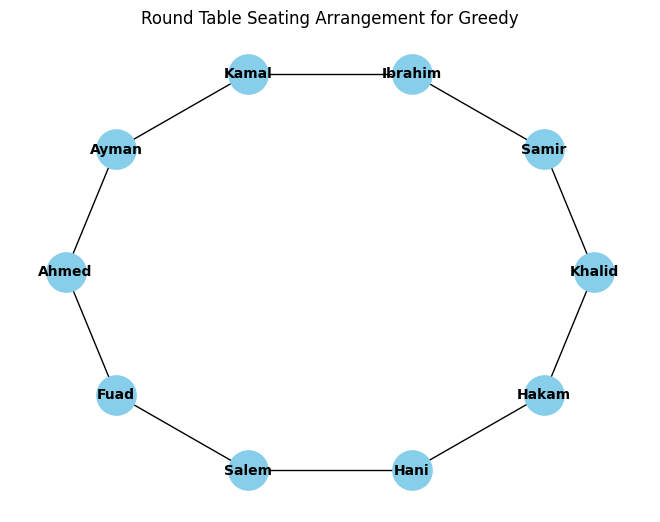

In [24]:
visualize_round_table(optimal_arrangement_greedy,'Round Table Seating Arrangement for Greedy')

<b>A* Search algorithm Implementation</b>

Heuristic Function

In [25]:
def heurestic_function(g_cost, h_cost):
    """ 
    Args:
        g_cost(int):
        h_cost(int):
    Returns:
        cost = f(n) = g(n) + h(n)
    """
    return g_cost + h_cost

In [ ]:
def a_star_search(graph):
    """
    Implementation of A* Search algorithm to find the optimal cyclic seating arrangement
    minimizing conflict based on dislike percentages.
    
    Args:
        graph (nx.Graph): NetworkX graph representing the complete dislike relationships.
    Returns:
        tuple or None: Tuple containing the optimal seating arrangement (path) minimizing conflict
                       and its corresponding minimum conflict cost, or None if no valid arrangement found.
    """
    individuals = list(graph.nodes)
    n = len(individuals)
    if n == 0:
        return None
    
    start_node = individuals[0]
    priority_queue = [(0, [start_node])]  
    visited = {start_node: 0}  
    
    while priority_queue:
        _, current_path = heapq.heappop(priority_queue)
        current_node = current_path[-1]
        
        if len(current_path) == n and current_path[0] in graph.neighbors(current_node):
            current_cost = total_cost_from_path(current_path, graph)
            return current_path, current_cost
        
        for neighbor in graph.neighbors(current_node):
            if neighbor not in current_path:
                new_path = current_path + [neighbor]
                new_cost = total_cost_from_path(new_path, graph)
                
                g_cost = new_cost
                if graph.has_edge(current_node, neighbor):
                    edge_weight = graph[current_node][neighbor]['weight']
                    h_cost = edge_weight
                else:
                    h_cost = 0  
                f_cost = heurestic_function(g_cost, h_cost)
                
                if neighbor not in visited or g_cost < visited[neighbor]:
                    visited[neighbor] = g_cost
                    heapq.heappush(priority_queue, (f_cost, new_path))
    return None

- Call function on the data and check the time, performace:

In [ ]:
%%time
if a_star_search(graph) == None:
    print("A star was not able to find a path")
else:    
    print("The best round table arrangmnet using A star is: ",optimal_arrangement)
    print("A star min total cost", min_cost)
    print("Average dislike percenatge per edge: ", np.sqrt(min_cost/55))

#### <b>Task 3,4,5: Discussion, Evaluation and Results</b>


Three algorthims were implemented to minimize the dislike as a round table arrangemnet is done. The below table shows a summary of the implementations done. 

Table 1: Algorthims Comparision

|Algorithm|Path|Minium Cost|CPU Times|Wall time|Time complexity|Completeness|
|---|---|---|---|---|---|----|
|Uniform Cost Search|['Khalid', 'Samir', 'Kamal', 'Ibrahim', 'Hani', 'Salem', 'Fuad', 'Ahmed', 'Hakam', 'Ayman']|15394.0|14.1 s|17.3 s||Complete|
|Greedy search|['Khalid', 'Samir', 'Ibrahim', 'Kamal', 'Ayman', 'Ahmed', 'Fuad', 'Salem', 'Hani', 'Hakam']|23958.0|0 ns|995 µs||
|A* Search|Was not able to find a path |-|0 ns|2.07 ms||



It is noticed that both Uniform Cost Search and Greedy serach have succeeded to find a path of a round table arrangement, howevere A* serach fails to do so. To start the evaluation between UCS and Greedy multi factors were considered: such as finding the best seating arrangement based on the conflict minimization objective (minimum cost), and (CPU time, wall time). In this case we have obtained a tradeoff, that is between the conflict minimization objective and the times. Because UCS had the lowest minimum cost 15394 and greedy has higher 23958 but in terms of time greedy was much faster with (0 CPU time and 995 µs) in comparision to USC needed more time with seconds (14.1 s CPU times) and (17.3 s for wall time). 

So the strengths of UCS was in reacheing the conflict minimization objective while it's weaknesses is related to the time consuming it takes longes as mentioned earlier. While greedy finds a good solution but it fails to reach the optimal since the minumm cost is much heigher than that the UCS finds. On the other hand, A* faild to do so

#### <b>Conclusion</b>
In conclusion, the objectives are met where three algorithms were implemnted to find the optimal round arrangement. The implemnations were called and evaluated mainly based on the minimum cost that they had but also considering other features too such as CPU time, time compelxity and completenss. While UCS was able to find the optimal solution in less cost than the greedy one (which is like in theory), Greedy search was faster in terms of both (CPU time) and (Wall time). Finally, the A star implemnatiions faild to find a solution and that wa due. to.

So the final seating arrangemnet was chosen to be the one that UCS obtained, which is the minumum conflict between seats. Folwoing is it's visulization:

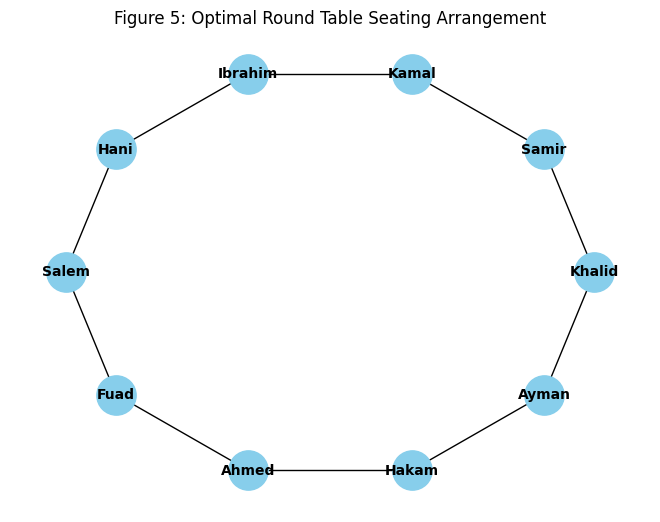

In [27]:
visualize_round_table(optimal_arrangement_ucs, 'Figure 5: Optimal Round Table Seating Arrangement')

#### <b>Refrences</b>

- [1] https://www.datacamp.com/tutorial/networkx-python-graph-tutorial, 2017
- [2] https://www.baeldung.com/cs/informed-vs-uninformed-search, 2024
- [3] https://www.educative.io/answers/what-is-uniform-cost-search, Fatima Hasan
- [4] https://www.freecodecamp.org/news/greedy-algorithms/